In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

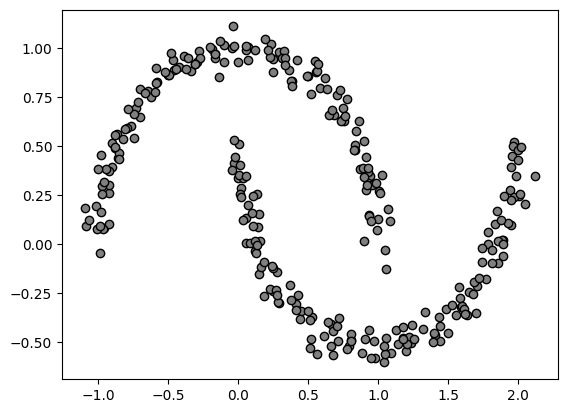

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],
            c='gray',
            edgecolor='black',
            marker='o')
plt.show()

In [4]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2)
dbs.fit(X)
label_dbs = dbs.labels_
print(label_dbs)

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


In [5]:
import pandas as pd
dbs_columns = ['dbs_comp1', 'dbs_comp2']
X_dbs_df = pd.DataFrame(X, columns=dbs_columns)
X_dbs_df['target'] = y
X_dbs_df['label_dbs'] = label_dbs
X_dbs_df.head(5)

,dbs_comp1,dbs_comp2,target,label_dbs
0,0.715413,-0.494089,1,0
1,0.246789,-0.240091,1,0
2,0.943261,0.346800,0,1
3,0.973742,-0.492901,1,0
4,1.239713,-0.411411,1,0


In [6]:
print(set(X_dbs_df['target']))
print(set(X_dbs_df['label_dbs']))

{0, 1}
{0, 1}


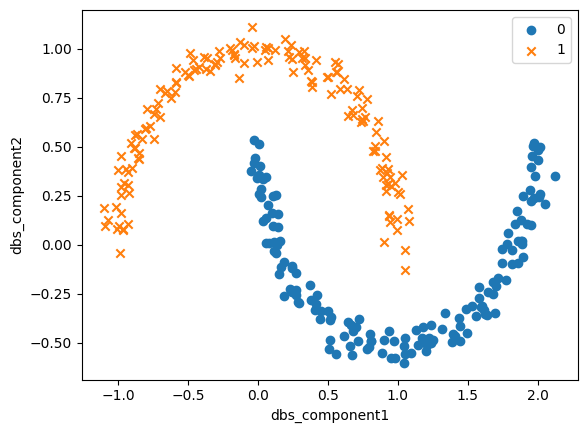

In [8]:
df = X_dbs_df
markers=['o', 'x']
for i, mark in enumerate(markers):
    df_i = df[df['label_dbs']==i]
    target_i = i
    X1 = df_i['dbs_comp1']
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)

plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()

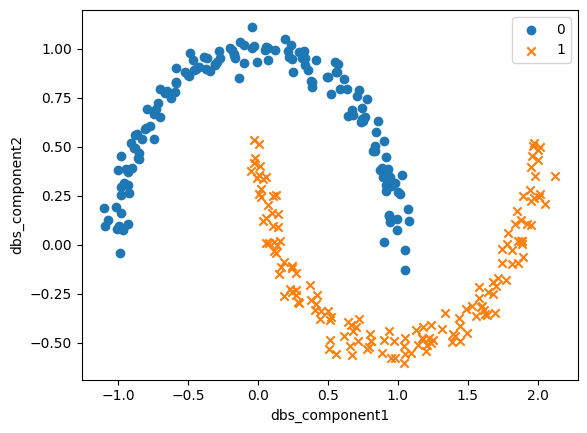

In [9]:
df = X_dbs_df
markers=['o', 'x']
for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['dbs_comp1']
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)

plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_dbs)
print(sil_score)

0.3284782012631504
